In [52]:
import TasmanianSG
import numpy as np

# imports specifically needed by the examples
import math
from random import uniform
from datetime import datetime

print("TasmanianSG version: {0:s}".format(TasmanianSG.__version__))
print("TasmanianSG license: {0:s}".format(TasmanianSG.__license__))

grid  = TasmanianSG.TasmanianSparseGrid()
grid1 = TasmanianSG.TasmanianSparseGrid()
grid2 = TasmanianSG.TasmanianSparseGrid()

TasmanianSG version: 4.0
TasmanianSG license: BSD 3-Clause


In [53]:

# EXAMPLE 1 for OSE:
# interpolate: f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
# using piecewise linear basis functions.

# 1000 2-dimensional sample points 
aPnts = np.empty([1000, 2])  
for iI in range(1000):
    for iJ in range(2):
        aPnts[iI][iJ] = uniform(-1.0, 1.0)

# Result
aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = math.cos(0.5 * math.pi * aPnts[iI][0]) * math.cos(0.5 * math.pi * aPnts[iI][1])

# Sparse Grid with dimension 2 and 1 output and refinement level 5
iDim = 2
iOut = 1
iDepth = 5
which_basis = 1 #1= linear basis functions -> Check the manual for other options

print("\n-------------------------------------------------------------------------------------------------")
print("Example 1 for OSE: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("       using fixed sparse grid with depth {0:1d}".format(iDepth))
print("       the error is estimated as the maximum from 1000 random points\n")

# construct sparse grid
grid.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")
aPoints = grid.getPoints()
iNumP1 = aPoints.shape[0]
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
grid.loadNeededPoints(aVals)

# compute the error
aRes = grid.evaluateBatch(aPnts)
fError1 = max(np.fabs(aRes[:,0] - aTres))
print(" For localp    Number of points: {0:1d}   Max. Error: {1:1.16e}".format(iNumP1, fError1))

# write coordinates of grid to a text file
f=open("fix_sparse_grid.txt", 'a')
np.savetxt(f, aPoints, fmt='% 2.16f')
f.close()


-------------------------------------------------------------------------------------------------
Example 1 for OSE: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
       using fixed sparse grid with depth 5
       the error is estimated as the maximum from 1000 random points

 For localp    Number of points: 145   Max. Error: 7.7461703622494493e-03


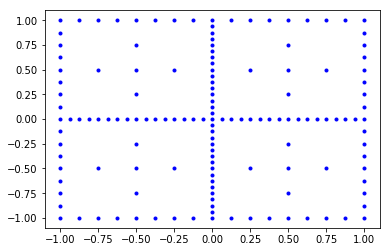

<module 'matplotlib.pyplot' from '/software/python-2.7.12-el7-x86_64/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [54]:
grid.plotPoints2D()

In [ ]:
# new function #c,w parameter #eingesetzte Werte

In [55]:
aPnts = np.empty([1000, 2])  
for iI in range(1000):
    for iJ in range(2):
        aPnts[iI][iJ] = uniform(-1.0, 1.0)
        
print('aPnts: ', aPnts)

('aPnts: ', array([[-0.26190489,  0.14241432],
       [ 0.34149246, -0.7049025 ],
       [-0.79476192, -0.26771832],
       ...,
       [ 0.32024973,  0.82116415],
       [ 0.43273527,  0.74040489],
       [-0.33184338,  0.29656989]]))


In [56]:
# Result
aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = math.cos(2 * math.pi *5+ 2*aPnts[iI][0]+2*aPnts[iI][1])

In [57]:
# Sparse Grid with dimension 2 and 1 output and refinement level 5
iDim = 2
iOut = 1
iDepth = 5
which_basis = 1 #1= linear basis functions -> Check the manual for other options

In [58]:
print("\n-------------------------------------------------------------------------------------------------")
print("Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("       using fixed sparse grid with depth {0:1d}".format(iDepth))
print("       the error is estimated as the maximum from 1000 random points\n")


-------------------------------------------------------------------------------------------------
Example 1 for OSM: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
       using fixed sparse grid with depth 5
       the error is estimated as the maximum from 1000 random points



In [59]:
grid.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")
aPoints = grid.getPoints() #gibt x-Achse aus --> [0] ist x aus Formel, [1] ist y aus formel
iNumP1 = aPoints.shape[0]
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] =math.cos(2 * math.pi *5+ 2*aPnts[iI][0]+2*aPnts[iI][1])
grid.loadNeededPoints(aVals)

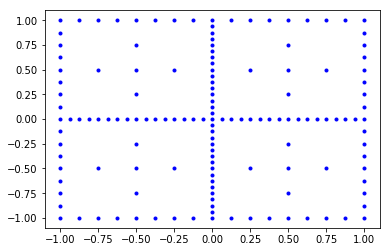

<module 'matplotlib.pyplot' from '/software/python-2.7.12-el7-x86_64/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [60]:
grid.plotPoints2D()

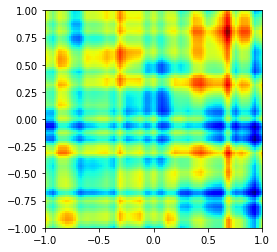

<module 'matplotlib.pyplot' from '/software/python-2.7.12-el7-x86_64/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [61]:
grid.plotResponse2D()

In [62]:
from matplotlib import pyplot as plt

In [78]:
## EXAMPLE 2 for OSE:
## interpolate: f(x,y) = exp(-x) / (1 + 100 * exp(-10 * y))
## using refinement

aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = math.cos(0.5 * math.pi * aPnts[iI][0]) * math.cos(0.5 * math.pi * aPnts[iI][1])

# Adaptive Sparse Grid with dimension 2 and 1 output and maximum refinement level 5, refinement criterion.
iDim = 2
iOut = 1
iDepth = 1
fTol = 1.E-5
which_basis = 1 
refinement_level = 5

# level of grid before refinement
grid1.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")

aPoints = grid1.getPoints()
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
grid1.loadNeededPoints(aVals)

print("\n-------------------------------------------------------------------------------------------------")
print("Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("   the error is estimated as the maximum from 1000 random points")
print("   tolerance is set at 1.E-5 and piecewise linear basis functions are used\n")

print("               Classic refinement ")
print(" refinement level         points     error   ")

#refinement level
for iK in range(refinement_level):
    grid1.setSurplusRefinement(fTol, 1, "fds")   #also use fds, or other rules
    aPoints = grid1.getNeededPoints()
    aVals = np.empty([aPoints.shape[0], 1])
    for iI in range(aPoints.shape[0]):
        aVals[iI] = math.cos(0.5 * math.pi * aPoints[iI][0]) * math.cos(0.5 * math.pi * aPoints[iI][1])
    grid1.loadNeededPoints(aVals)

    aRes = grid1.evaluateBatch(aPnts)
    fError1 = max(np.fabs(aRes[:,0] - aTres))

    print(" {0:9d} {1:9d}  {2:1.2e}".format(iK+1, grid1.getNumPoints(), fError1))

# write coordinates of grid to a text file
f2=open("Adaptive_sparse_grid.txt", 'a')
np.savetxt(f2, aPoints, fmt='% 2.16f')
f2.close()
 
grid2 = TasmanianSG.TasmanianSparseGrid()
grid2.makeLocalPolynomialGrid(iDim, iOut, refinement_level+iDepth, which_basis, "localp")
a = grid2.getNumPoints()
 
print("\n-------------------------------------------------------------------------------------------------")
print( "   a fix sparse grid of level ", refinement_level+iDepth, " would consist of " ,a, " points")
print("\n-------------------------------------------------------------------------------------------------\n") 



-------------------------------------------------------------------------------------------------
Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
   the error is estimated as the maximum from 1000 random points
   tolerance is set at 1.E-5 and piecewise linear basis functions are used

               Classic refinement 
 refinement level         points     error   
         1         9  3.06e-01
         2        14  2.40e-01
         3        27  2.08e-01
         4        58  2.06e-01
         5       125  1.89e-01

-------------------------------------------------------------------------------------------------
('   a fix sparse grid of level ', 6, ' would consist of ', 321, ' points')

-------------------------------------------------------------------------------------------------



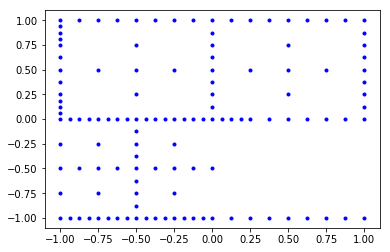

<module 'matplotlib.pyplot' from '/software/python-2.7.12-el7-x86_64/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [79]:
grid1.plotPoints2D()

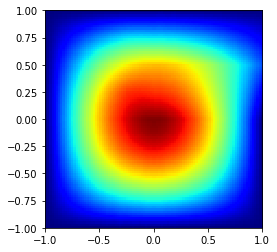

<module 'matplotlib.pyplot' from '/software/python-2.7.12-el7-x86_64/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [80]:
grid1.plotResponse2D()

In [ ]:
# New function

In [75]:
## EXAMPLE 2 for OSE:
## interpolate: f(x,y) = exp(-x) / (1 + 100 * exp(-10 * y))
## using refinement

aTres = np.empty([1000,])
for iI in range(1000):
    aTres[iI] = math.cos(2 * math.pi *5+ 2*aPnts[iI][0]+2*aPnts[iI][1])

# Adaptive Sparse Grid with dimension 2 and 1 output and maximum refinement level 5, refinement criterion.
iDim = 2
iOut = 1
iDepth = 1
fTol = 1.E-5
which_basis = 1 
refinement_level = 5

# level of grid before refinement
grid1.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")

aPoints = grid1.getPoints()
aVals = np.empty([aPoints.shape[0], 1])
for iI in range(aPoints.shape[0]):
    aVals[iI] = math.cos(2 * math.pi *5+ 2*aPnts[iI][0]+2*aPnts[iI][1])
grid1.loadNeededPoints(aVals)

print("\n-------------------------------------------------------------------------------------------------")
print("Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)")
print("   the error is estimated as the maximum from 1000 random points")
print("   tolerance is set at 1.E-5 and piecewise linear basis functions are used\n")

print("               Classic refinement ")
print(" refinement level         points     error   ")

#refinement level
for iK in range(refinement_level):
    grid1.setSurplusRefinement(fTol, 1, "fds")   #also use fds, or other rules
    aPoints = grid1.getNeededPoints()
    aVals = np.empty([aPoints.shape[0], 1])
    for iI in range(aPoints.shape[0]):
        aVals[iI] = math.cos(2 * math.pi *5+ 2*aPnts[iI][0]+2*aPnts[iI][1])
    grid1.loadNeededPoints(aVals)

    aRes = grid1.evaluateBatch(aPnts)
    fError1 = max(np.fabs(aRes[:,0] - aTres))

    print(" {0:9d} {1:9d}  {2:1.2e}".format(iK+1, grid1.getNumPoints(), fError1))

# write coordinates of grid to a text file
f2=open("Adaptive_sparse_grid.txt", 'a')
np.savetxt(f2, aPoints, fmt='% 2.16f')
f2.close()
 
grid2 = TasmanianSG.TasmanianSparseGrid()
grid2.makeLocalPolynomialGrid(iDim, iOut, refinement_level+iDepth, which_basis, "localp")
a = grid2.getNumPoints()
 
print("\n-------------------------------------------------------------------------------------------------")
print( "   a fix sparse grid of level ", refinement_level+iDepth, " would consist of " ,a, " points")
print("\n-------------------------------------------------------------------------------------------------\n") 



-------------------------------------------------------------------------------------------------
Example 2: interpolate f(x,y) = cos(0.5 * pi * x) * cos(0.5 * pi * y)
   the error is estimated as the maximum from 1000 random points
   tolerance is set at 1.E-5 and piecewise linear basis functions are used

               Classic refinement 
 refinement level         points     error   
         1        12  2.12e+00
         2        25  2.30e+00
         3        55  3.16e+00
         4       123  2.85e+00
         5       275  3.21e+00

-------------------------------------------------------------------------------------------------
('   a fix sparse grid of level ', 6, ' would consist of ', 321, ' points')

-------------------------------------------------------------------------------------------------



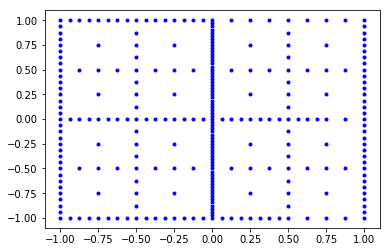

<module 'matplotlib.pyplot' from '/software/python-2.7.12-el7-x86_64/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [76]:
grid1.plotPoints2D()

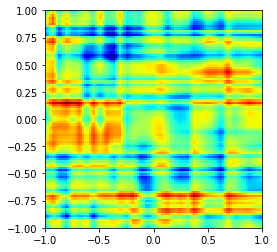

<module 'matplotlib.pyplot' from '/software/python-2.7.12-el7-x86_64/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [77]:
grid1.plotResponse2D()